In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  3<sup>rd</sup> October, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [6]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [5]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [9]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- The **Dow Jones** closed 134 points or 0.5% lower at 27,683 on Friday, as President Trump tested positive for coronavirus but reversed from steep losses earlier in the session after the House Speaker Nancy Pelosi said that she was optimistic about striking a deal on a new aid package. The S&P 500 dropped 32 points or 1% to 3,348 and the Nasdaq declined 251 points or 2.2% to 11,075, led by a fall in tech shares. The jobs report also weighed on investors' mood as nonfarm payrolls rose by 661 thousand in September, well below expectations of 850 thousand, while the jobless rate dropped to 7.9% from 8.4% in August. During the week however, the Dow Jones jumped 1.9%, the S&P climbed 1.5%, and the Nasdaq gained 1.5%. **China’s Semiconductor Manufacturing International Corp. fell to a four-month low in Hong Kong trading after the U.S. imposed export restrictions on the nation’s largest chipmaker.**


- **European equities** pared some losses at the end of Friday's session, as data pointing to a slowdown in the economic recovery of both the US and Europe boosted hopes of further stimulus. The highly anticipated US employment report showed that the pace of job creation slowed more than expected in September, while the Eurozone inflation fell deeper into negative territory amid subdued demand. At the same time, news about US president Donald Trump testing positive for Covid-19 and his immediate quarantine weighed on sentiment. Frankfurt’s DAX 30 dropped 0.3% to 12,689 while other major indexes closed mixed: Paris’ CAC 40 and Milan’s FTSE MIB closed near the flat line; while London’s FTSE 100 and Madrid’s IBEX 35 added 0.4%. For the week, the DAX 30 ended 1.8% higher.


- For the week, the FTSE 100 added 1%. The **FTSE 100** cut early losses to close up 0.4% at 5,902 on Friday, as weaker-than-expected data from both the US and the Eurozone raised expectations that further stimulus might be needed to support the economies hit by the pandemic. Meanwhile, investors remained cautious amid concerns about the lack of progress in Brexit negotiations and the threat of fresh lockdown measures due to rising COVID-19 cases. On the corporate front, Gold miner Centamin slumped 17% after it forecast a fall in annual production as it delayed some open-pit mining operations at its key Sukari mine in Egypt.


- The **CAC 40 (France)** close near the flat line at 4,825 on Friday, while for the week the index gained 2%. French Health Minister Olivier Vera said that Paris will be placed on maximum COVID alert from as soon as Monday, with **new measures including the closure of restaurants and bars and the imposition of further restrictions on public life**. At the same time, recent data showed the **Eurozone inflation fell deeper into negative territory in September**, raising pressure on ECB policymakers to deliver more stimulus. On the corporate front, shares in French telecom companies Orange, Bouygues Telecom and Iliad outperformed following the results of an auction of the country's 5G spectrum sale.


- The **IBEX 35 (Spain)** added 0.4% on Friday, following a 0.2% gain in the prior session. For the week, the IBEX 35 gained 1.9%. On the domestic economic front, latest data showed that Spain's labour market continued to recover in September while **tourist arrivals declined for the sixth consecutive month**. On the coronavirus front, Spain reported 9,419 daily cases on Thursday, almost 35% of which in Madrid, bringing the total number of infected people to 778,607. Meantime, S**pain's central government warned Madrid that it has until Saturday to impose new lockdown measures**, but the region raised questions about the legal credibility of the order and said it will challenge it in court. 


- During the week, the TSX climbed 0.9%. **Canada**’s TSX gained 0.1% on Friday, despite US President Donald Trump testing positive for COVID-19 and energy stocks falling sharply. On the commodities front, prices of WTI crude oil dropped a sharp 4.4% to USD 37 per barrel during the session on oversupply fears, booking their fourth negative week in five. Meanwhile, gold prices dropped 0.4% to USD 1908 per ounce. Still, sentiment was upbeat after data showed on Thursday the domestic PMI for September pointing to the fastest pace of expansion in more than two years.


- **Mexico**’s IPC gained less than 0.1% on Friday and +0.2% for the week, decoupling from sharp losses in the US and other major indices. On the domestic side, the central bank's September survey showed economists raised their 2021 GDP growth forecast to 3.3% from 3.0% in August, while President Lopez Obrador announced that the economy added 118 thousand formal jobs in September. Meanwhile, both the coincident and leading indicators for August continued to show improvement, while auto sales declined at a softer 22.9% YoY in September compared to -28.7% in August.


- **Brazil**’s Ibovespa lost 1.5% on Friday and 3.1% for the week, becoming the worst performer globally. On the domestic front, data showed that industrial production in Brazil contracted 2.7% yoy in August following a downwardly revised 2.8% drop in the previous month and compared with market expectations of a 2.2% decline, adding to concerns of further stimulus needs. The **South Africa** FTSE/JSE Africa All Shares index fell 0.3% in afternoon trading on Friday. On the corporate front, heavyweights BHP Group Plc, Richemont, Anglo American Plc and Naspers were the worst performers. For the week, the benchmark index rose 1.3%, its first weekly advance in three.


- **ECONOMIC DATA WATCH:** PMI data reflects uneven recovery in global manufacturing sector. Manufacturing growth accelerated in the Eurozone and China but was slightly slower in the US and UK; Japan’s factory activity remained at contraction level. US data were mixed in general – US 2Q GDP growth was revised slightly hgher to -31.4% QOQ; initial jobless claims held steadily above 800k for the fifth consecutive month, ADP private payrolls amounted to 749k in September, better than expected. Personal spending growth eased further and personal income fell. Construction spending recorded solid gains. 


- **ECONOMIC DATA WATCH:** Other than that, UK 2Q GDP growth was revised to -19.8% QOQ; Eurozone economic sentiment improved further. Japan’s Tankan Survey points to bleak recovery outlook; jobless rate climbed to 3-year high; industrial production and retail sales however posted growth. Elsewhere in Asia, Vietnam 3Q GDP growth sprang back to 2.6% YOY, Hong Kong retail sales saw another double-digit losses.


- **GEOPOLITICS:** Vladimir **Putin issued a joint call with Donald Trump and Emmanuel Macron for Armenians and Azerbaijanis to halt their worst fighting in decades over disputed land**. Azerbaijan’s President Ilham Aliyev vowed to continue a military campaign until Armenian forces leave disputed territory, while Armenia appealed for pressure against Turkey’s involvement in the conflict. The **U.S. unveiled a plan to help Taiwan gain greater clout across Asia and Latin America** by addressing needs for infrastructure funding in both regions. **Kuwait’s new leader, Sheikh Nawaf Al-Ahmed Al-Jaber Al-Sabah has taken the reins** of one of the world’s wealthiest countries as it faces a financial crisis made worse by internal political wrangling.

**STOCKS THAT DEFINED THE WEEK**


**American Airlines Group Inc. (AAL)**

-  The future of more than 32,000 airline workers is up in the air. American Airlines Group Inc. and United Airlines Holdings Inc. said they would move forward with that many job cuts after lawmakers failed to reach an agreement on a coronavirus-aid package. They said they would bring workers back if a deal could be reached shortly. Airlines received USD 25 billion in earlier government aid and say more is needed to offset deep declines in travel. American Airlines shares rose 2.4% Thursday.

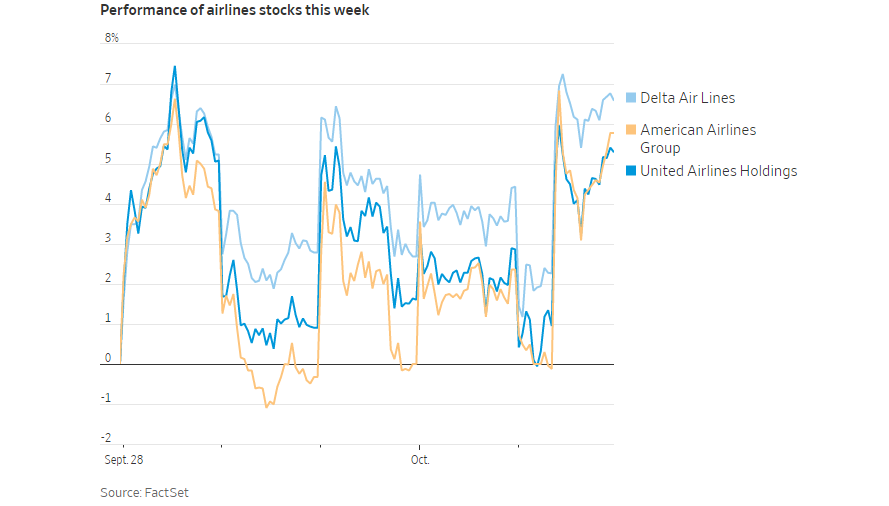

**Walt Disney Co. (DIS)**

- The Magic Kingdom hasn’t yet found the right spell for the coronavirus. **Walt Disney Co. said Tuesday that it would lay off about 28,000 domestic theme-park employees who have been on furlough since April**. In announcing the layoffs Tuesday, Disney said the impact of the pandemic had been exacerbated in California by the state’s “unwillingness to lift restrictions that would allow Disneyland to reopen”—another example of the ongoing tension between governments trying to curb the spread of coronavirus and businesses struggling to pay the bills amid operating restrictions. Disney shares fell 1.1% Wednesday.

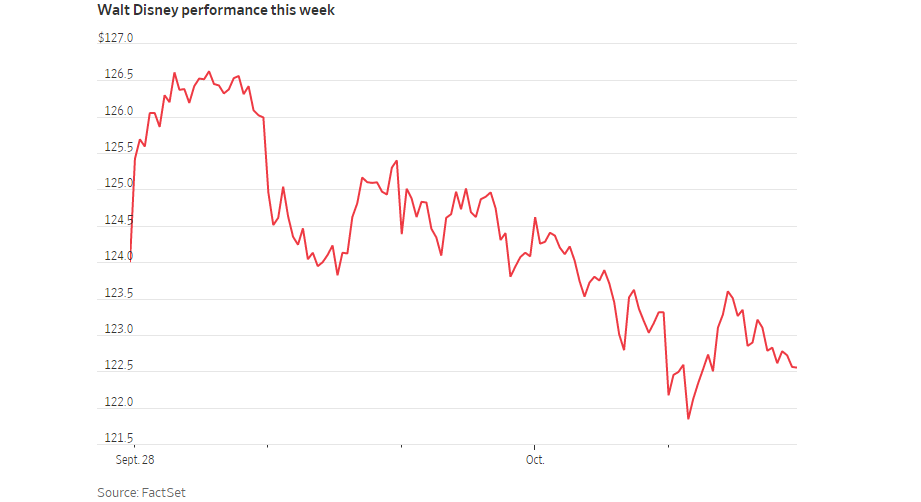

**Uber Technologies Inc. (UBER)**

- London travelers will soon be able to Uber once again. **A London court found Monday that Uber Technologies Inc. was now “fit and proper” to operate in the U.K. capital, despite some continued breaches**. The company said in a statement that it had been granted an 18-month license that made it subject to a bevy of new conditions. The ruling is the latest development in Uber’s ongoing struggle to build trust with regulators after the company regularly tested the regulatory and legal envelope of countries while under the leadership of its co-founder and former chief executive Travis Kalanick. Uber shares rose 3.2% Monday.

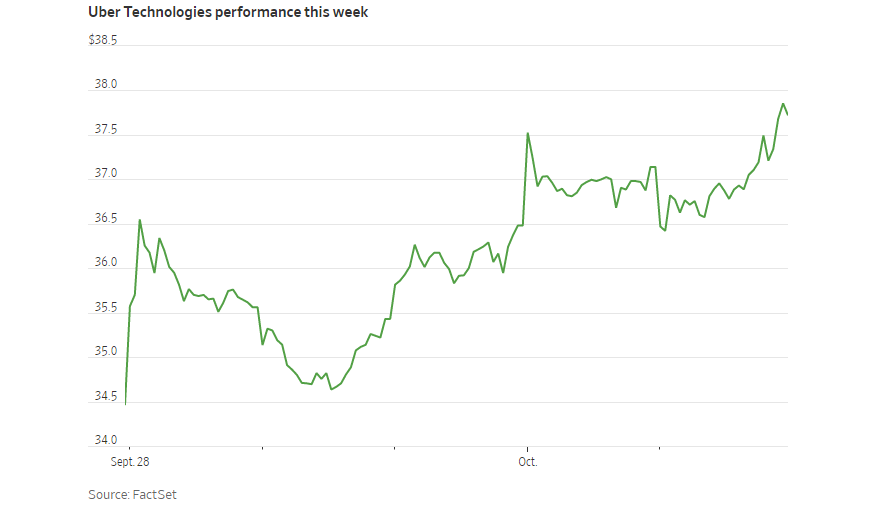

**JPMorgan Chase (JPM)**

- The nation’s largest bank by assets is paying a hefty price for “spoofing.” **JPMorgan Chase & Co. agreed to pay USD 920 million and admit misconduct tied to claims its traders “spoofed” to manipulate the price of Treasury securities, one of the largest and most liquid trading markets in the world**. Spoofers enter and quickly cancel large orders in an effort to deceive others about supply and demand. The settlement resolves investigations by the Commodity Futures Trading Commission, the Justice Department and the Securities and Exchange Commission. Prosecutors and regulators began cracking down on spoofing in 2014, and financial institutions have paid more than USD 1 billion in fines tied to civil and criminal spoofing probes. JPMorgan shares fell 0.8% Tuesday.

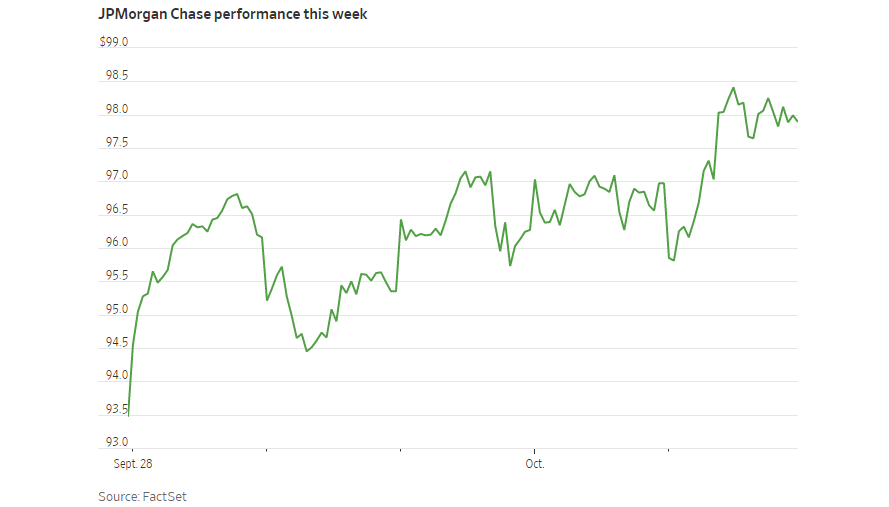

**Palantir Technologies Inc. (PLTR)**

- Palantir Technologies Inc. gained fame as a spy-software and analytics machine, but its debut in the red-hot IPO market was mired by technical issues. Palantir and Asana Inc. made history by both completing direct listings on the same day, something the New York Stock Exchange had never dealt with before. Technical issues with Morgan Stanley software prevented some existing Palantir investors from unloading shares for much of the afternoon, according to people familiar with the matter. Palantir shares closed 5% below their opening price.

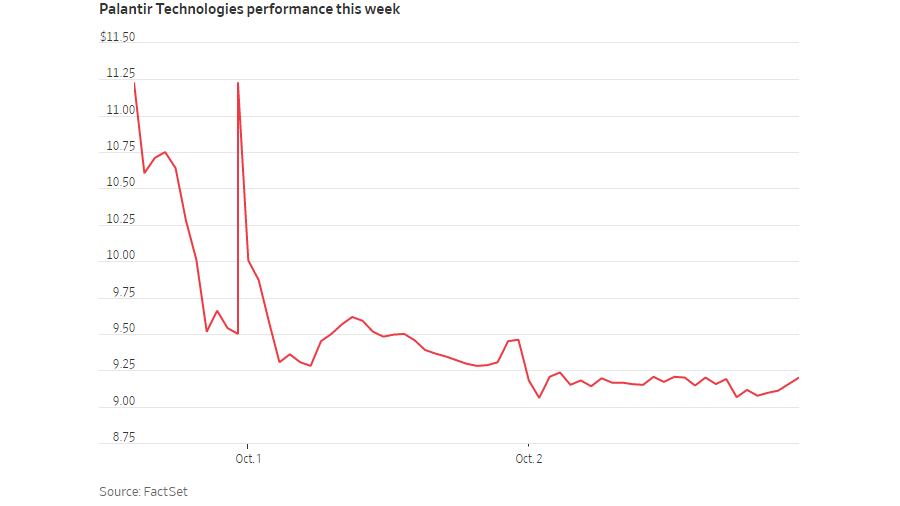

**ECONOMIC DATA RELEASES NEXT WEEK:**


- Next week kicks off with the release of a slew of services PMI data alongside Singapore and Eurozone retail sales as well as the Sentix Investor Confidence Index. On Tuesday, the focus in on Australia as the RBA is expected to keep cash rate steady at 0.25%. Australia trade data will be released in early morning prior to the announcement. The rest of the day is quiet with only US trade data slated for evening’s release. 


- On Wednesday, data are also limited to Australia services PMI, Hong Kong Markit PMI, Malaysia foreign reserves and US mortgage applications. On Thursday, the Federal Reserve publishes its latest meeting minutes, likely to confirm the central bank’s dovish stance. Other than that, there are also UK RIC house price balance index, China Caixin Services PMI as well as US initial jobless claims. Last but not least on Friday, Japan’s household spending and cash earning data are due in the morning, followed by Australia home loan, UK industrial production and goods trade balance in the afternoon.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

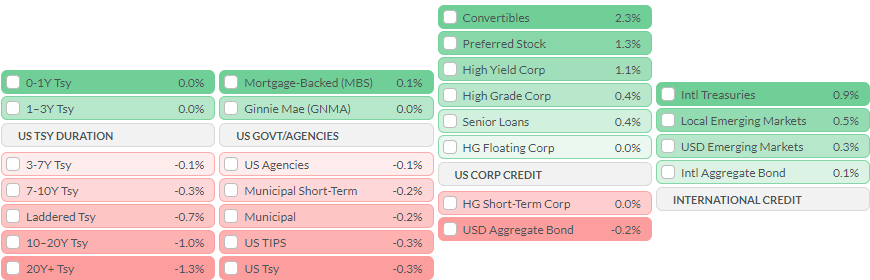

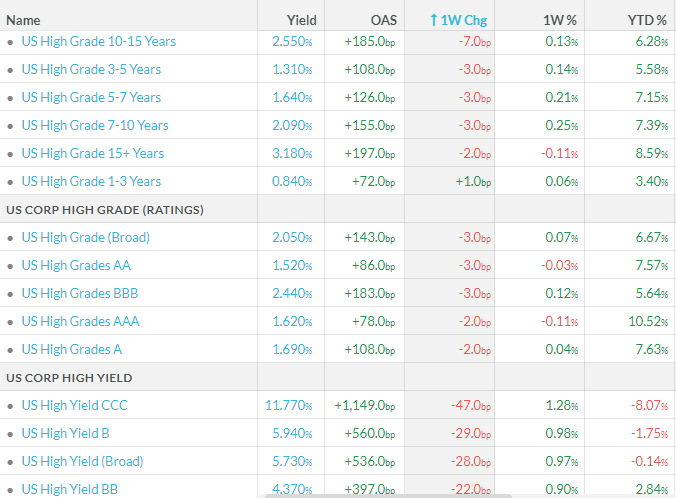

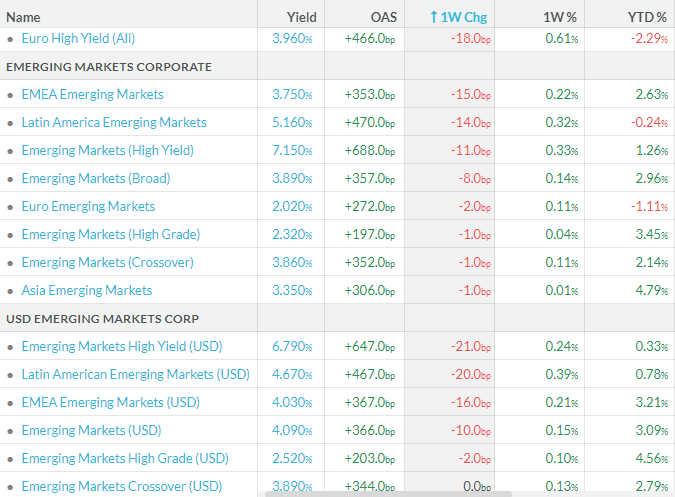

**HIGHLIGHTS**


- The week under review saw US Treasuries mostly flat throughout with attention focussed on the presidential debate earlier. Some better-than expected economic data stemming from initial jobless claims for week ending 26th Sep and construction activity failed to inspire meaningful moves in bonds. Overall benchmark yields saw little change i.e. between -1 to +1bps save for the long-bond which was pressured higher by 5bps as the curve steepened slightly. 


- The 2Y benchmark yields; reflective of interest rate predictions ended within 1bps lower at 0.13% whilst the much-watched 10Y yields (which traded within a wider 0.51%-0.75% range); edged 1bps higher at 0.68%. Bond gains might be expected to be minimal as the Fed is expected to stay pat on interest rates until 2023. Expect bond trading activity to be influenced next week by the release of jobs data for September tonight; followed by clues on the proposed debate by lawmakers with regards to a new COVID-19 stimulus bill. 


- Although the future continues to be fraught with uncertainty, one thing is certain: central banks will remain accommodative for an extended period. In the US, the average inflation targeting approach outlined by the Federal Reserve (Fed) actually describes a very unusual environment, as there have only been 22 months in the past 50 years when the personal consumption expenditures price index actually met or exceeded the 2% level. 


- Elsewhere, central banks such as the Reserve Bank of Australia have indicated that there may be further rate cuts to come, while the Bank of England continues to contemplate negative rates. Whatever the easing tool of choice, it’s clear that monetary policy will keep a cap on yields. More recent virus developments also suggest that government bond yields are unlikely to move sharply higher in the near term. With the pick-up in cases, high frequency indicators have shown a slowing in activity. This dynamic is starting to feed through to economic data, with services purchasing managers’ indices falling across the US and Europe.


- Although developed market government bonds may not offer the hedge they used to, they still managed to generate positive returns in a month when equity markets sold off. As the positive momentum in equities reversed in September, resulting in a -3.8% return over the month for the S&P 500, developed market government bonds posted a total return of 0.7% over the same period. Notably, German Bunds—which started the month yielding -0.4% in the 10-year part of the curve—generated a 1.0% return, proving that even negative yielding bonds can offer an element of ballast to a portfolio. 10-year US Treasury yields may be towards the low end of the expected 0.5%-1.0% range (at 0.68%), but the catalysts that would push them meaningfully higher—namely, further fiscal stimulus, a vaccine or the removal of US election uncertainty—are unlikely to materialise until later in the quarter. (All data to 30 September).


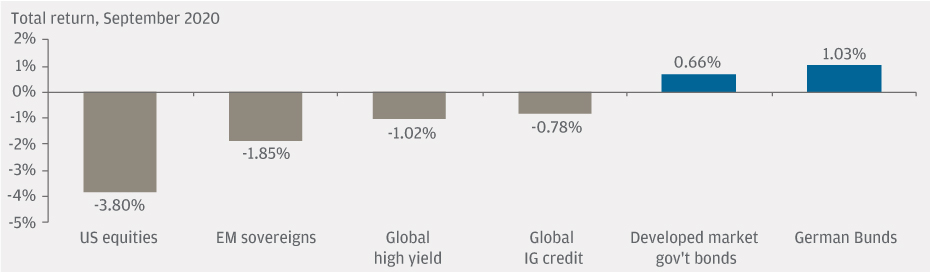
*Source: Bloomberg, Barclays, Bank of America Merrill Lynch, J.P. Morgan. EM: Emerging markets, IG: Investment grade. As of 30 September 2020.


- Technical factors are also contributing to the supportive environment for government bonds. Powerful bond buying programmes from central banks have proven more than capable of soaking up the increased government bond issuance that we are seeing as a means of funding fiscal spending measures. In the US, the Fed is also committed to maintaining a functioning market. Any sign that US Treasuries are not acting as a hedge—such as earlier in the year, when 10-year Treasury yields rose 65 basis points between 9-18 March at the same time as stocks fell almost 20%—will likely spur the Fed to take further action.


**CENTRAL BANKS ACTION UPDATE**


- **Brazilian markets sank**, spurring the central bank to step in to prop up the real, after President Jair Bolsonaro revived plans to launch a social program that investors fear could jeopardize an austerity rule. **Argentina**’s central bank will **allow a faster depreciation of the peso**. **Egypt** attracted orders for nearly five times the USD 750 million it offered in the Middle East and North Africa’s **first sovereign green bond**, as it pushes ahead with anti-pollution and renewable energy projects. 


- The Reserve Bank of India rescheduled this week’s interest-rate meeting after authorities failed to appoint external members to the Monetary Policy Committee. **Hungary**’s central bank **left its key one-week deposit rate unchanged** as a recovery in the forint gives policy makers time to assess whether they’ll need to continue tightening. **The Philippine central bank kept its key rate unchanged** for a second meeting and **approved an USD 11 billion cash advance to the government to support pandemic relief measures**. **Vietnam**’s central bank **cut rates for the third time this year**, seeking to bolster a recovery.


- **Poland**’s rate cuts since the start of the Covid-19 pandemic have been only “moderately positive” and **borrowing costs may need to be gradually raised again next year, according to central banker Jerzy Kropiwnicki**. Polish inflation accelerated in September, defying the central bank’s view that the Covid-19 pandemic will damp consumer-price growth even with interest rates set near zero.


- **Brazil’s public debt rose to a record 88.8% of GDP in August** as the government increases spending to fight the impact of the coronavirus pandemic. The nation’s **Central Bank President Roberto Campos Neto said that the monetary institution will withdraw its commitment to not raise interest rates explained on its forward guidance policy if the spending cap is violated**, Reuters reported citing three unnamed sources who heard him speaking in a virtual event.


- **Mexico is likely to have to pause its 13-month cycle of rate cuts due to inflation**, deputy central bank Governor Javier Guzman told Bloomberg. Mexico faces the risk of a sovereign downgrade mostly because of its slow growth rate, the financial stability council said. The nation’s lack of fiscal stimulus in the face of economic crisis was the right call, the president’s chief of staff Alfonso Romo said.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [10]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [11]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [12]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns), vmax=0.07)
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [13]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [14]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> Decent volatility in FX as talks between Mnuchin and Pelosi on the US stimulus bill dictated risk appetite for most of the week, which at this point has little chances of passing the Senate. US presidential debate had Biden in the lead but there were little market implications. News just came in that Trump and the First Lady has tested positive for Coronavirus which immediately sent the USD flying but quickly reversed. DXY is slightly lower from 94.5 to 93.81. Mexican Peso (+3.33%) and South African Rand (+3.45%) were the best performers in FX, while Brazilian Real lost the most (-2.10%).


- **USD:** : The dollar index ended slightly higher above 93.8 on Friday, moving away from a 2-week low of 93.656, after President Trump tested positive for coronavirus and the jobs report showed the US economy added 661 thousand jobs in September, less than market forecasts of 850 thousand. Meanwhile, uncertainty regarding a new coronavirus aid bill remain although the House Speaker Nancy Pelosi said that she was optimistic about striking a deal on a new package. On Thursday, the House of Representatives approved the USD 2.2 trillion coronavirus aid bill from the Democrats but the plan is more likely to be rejected in the Senate. Still, for the week the dollar lost 0.44%.


- **EUR**: The euro weakened towards 1.17 on Friday after data showed that Eurozone inflation fell deeper into negative territory in September, raising concerns about the region's economic recovery. Consumer prices declined 0.3% from a year earlier, the biggest drop in over four years; while the core inflation hit an all-time low of 0.2%. Investors will be looking for any clue about further monetary policy easing from the ECB, although no move is likely in October. On Wednesday, ECB President Christine Lagarde signaled a change to the central bank’s strategy to align it with that of the US Federal Reserve, which would probably allow inflation rate to overshoot after missing the central bank's target for years. Thursday’s release of the Sep 9-10 ECB minutes may therefore offer some insight into the ECB’s thinking and members' views on the strength of the euro. There will also be a whole host of ECB speakers running from Tuesday through Thursday.


- **GBP**: The British pound held above 1.29 on Friday as the last scheduled round of Brexit trade talks comes to an end, before EU leaders assess progress at a summit on October 15-16. Investors will also monitor Saturday's meeting between British Prime Minister Boris Johnson and European Commission President Ursula von der Leyen. Earlier in the session, British housing minister Robert Jenrick said that both parties remain divided on key issues, while Financial Times had reported yesterday that officials in London were increasingly optimistic that an agreement could be reached. Meanwhile, the EU has formally issued notice to the UK government of the first step of a legal infringement process after the deadline on the UK's Internal Market Bill lapsed Wednesday. In September, the pound lost more than 3% against the greenback, due to lack of progress in Brexit negotiations and the threat of fresh lockdown measures.


- **JPY**: The recent US yield curve mini steepening, including US 10 year yields trading over 0.70bp, did not last long and only provided brief support to USD/JPY. Remember, were reflationary conviction to really ripple through the bond market, one would expect the Japanese yen to underperform on the crosses, with USD/JPY staying supported on firmer US yields. Progress on the fourth economic stimulus plan will have a major say in this story.


- The Japanese Yen added 0.323 points or 0.31% to 105.172 against the US Dollar on Friday on a bid for the safe haven Yen following news that the US President Donald Trump and first lady Melania had contracted the novel coronavirus. On the data front, the Consumer Confidence Index in Japan increased to 32.7 in September, the highest since February, while the unemployment rate edged up to 3% in August compared to 2.9% in the prior month. It was still the highest jobless rate since May 2017. Separate data compiled by the labor ministry showed there were only 104 job openings for every 100 job-seekers in August.



- **AUD**: Speculation about a possible rate cut from the Reserve Bank of Australia has risen in the past few weeks, and next week’s RBA meeting will therefore be an important one. A shift to a more dovish rhetoric may be on the cards. The futures market seems to be pricing in around a 68% chance of a cut at this meeting, so the balance of risks for AUD is slightly tilted to the upside next week. Still, with a number of factors affecting global risk sentiment (possible new lockdowns, developments in the US stimulus bill, the impact of Trump's quarantine on the Presidential campaign, Belarus sanctions), AUD will not lack external drivers next week.  


- **MXN**: **Mexico's peso outshone Latin American peers on Thursday**, with Brazil's real weighed by concerns about government spending and Chile's peso falling after the country's 2021 economic growth forecast was cut. The Mexican peso rose 1.3%, with data showing the **country's manufacturing PMI hitting a six-month high in September bolstering gains**. The index, however, was still in contraction territory. The USD/MXN is falling for the third day in a row on Friday. Recently it bottomed at 21.76, reaching the lowest level since September 23. **The Mexican peso remains strong and is among the top performers of the week (+3.33%) after the South African Rand (+3.45%)**.


- **BRL**: **Brazilian Real was the worst performer this week in FX, losing 2.10%** as worries remained that the government would overshoot its spending limit. Amid data showing public debt widened to a record, investors have been concerned about the financing of a new fiscal aid package by President Jair Bolsonaro's government. Brazilian Economy Minister Paulo Guedes on Wednesday appeared to row back on a government proposal that the program be funded by tapping money earmarked for future debt payments, saying his team had never intended to pay for the program that way.


- **ZAR**: The **South African rand hit an over one-week high of 16.4** against the dollar on Friday, becoming the **best performer of the week in FX**, after news that President Cyril Ramaphosa will on Sunday launch the Mooikloof Mega Residential City, the government’s first project in its USD 139 billion infrastructure program. Investors also welcomed news that South Africa is intensifying the fight against graft as the ruling party ANC has started to take action against members who are accused of corruption, with several arrests and councillors being barred from taking part in meetings. On the global front, worries persist over the US presidential election after President Donald Trump had tested positive for the coronavirus.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [15]:
#comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [16]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

C:\Users\Harsh\Anaconda3\lib\site-packages\investpy\commodities.py:523: Warning:

Note that the displayed commodity data can differ depending on the country. If you want to retrieve copper data from either united states or united kingdom, specify the country parameter.



In [17]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [18]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [19]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [26]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

> Commodities traded lower for a second week as the Covid-19 pandemic continues to cloud the global economic outlook and with that the demand projections for several growth-dependent commodities from crude oil to copper. News on Friday that President Trump and the first lady had both tested positive helped strengthen some of the moves that had already started earlier in the week.

> President Trump’s positive result initially sent stocks lower while gold and the U.S. dollar rallied. It will likely sharpen already intense attention on the President’s handling of the pandemic as he campaigns for re-election against Joe Biden, who leads in national polls. For now, the market has taken the view that the latest development may further weaken Trump’s chances of re-election, a development that is being treated as potentially dollar negative, hence the Greenback’s limited positive reaction to the news. Silver and platinum, which got slammed hard on the way down, came top as they played catch-up.


-  **Crude oil** extended its decline, becoming the worst performer in the commodities space, diving almost 7% on the week, due to continued worries about the pace of the recovery in global fuel demand together with increased focus on OPEC and its ability to keep production down. This comes after Libya’s oil industry, all but shut down since January because of civil war, began to recover, potentially leading to rapid output growth over the coming months.


- The demand side, meanwhile, remains troubled by the continued rise in Covid-19 cases leading to renewed lockdowns. With the timing of a widely available vaccine still uncertain, the captains of the three biggest independent oil trading houses don’t see a meaningful recovery in global oil demand for at least another 18 months. Having found resistance at 42.60/b, Brent crude turned lower and broke below recently established support to touch the lowest level since June. The market will now be focusing on the June 12 low at 37/b as the next key level of support.


- **Gold** returned to relative safety above USD 1900/oz following the recent correction which, from a technical perspective, was a relatively weak one within the established uptrend. Investors using exchange-traded funds backed by bullion have stayed very resilient since gold peaked back in August. Despite having seen a top to bottom correction of 226 dollars, total holdings did not suffer any setbacks. The current 110.9 million ounces in total holdings are just a whisker below the recent record. Outlook for Gold looks positive overall and while we may not see any significant near-term developments in real yields and inflation, the uncertainty ahead of the November U.S. presidential election should be enough to dissuade anyone from taking profit while expectations for a weaker dollar and lower real yields eventually may take prices higher into 2021.


- **Copper** which in recent weeks looked increasingly at risk of a correction dropped the most since March. This was in response to easing fundamentals as seen through the recent spike in stocks at LME monitored warehouses and a brewing slowdown in China as credit begins to tighten, Adding to this, the recent dollar strength and an elevated speculative long held by funds, the price had increasingly been left exposed to a pull back after recording six straight months of gains. From a technical perspective, HG Copper has already reached its first target at USD 2.84/lb with the next key level being the August low at USD 2.7850/lb.


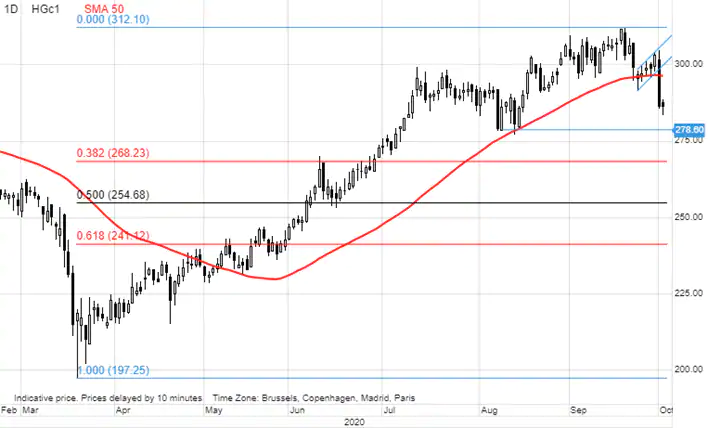


[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

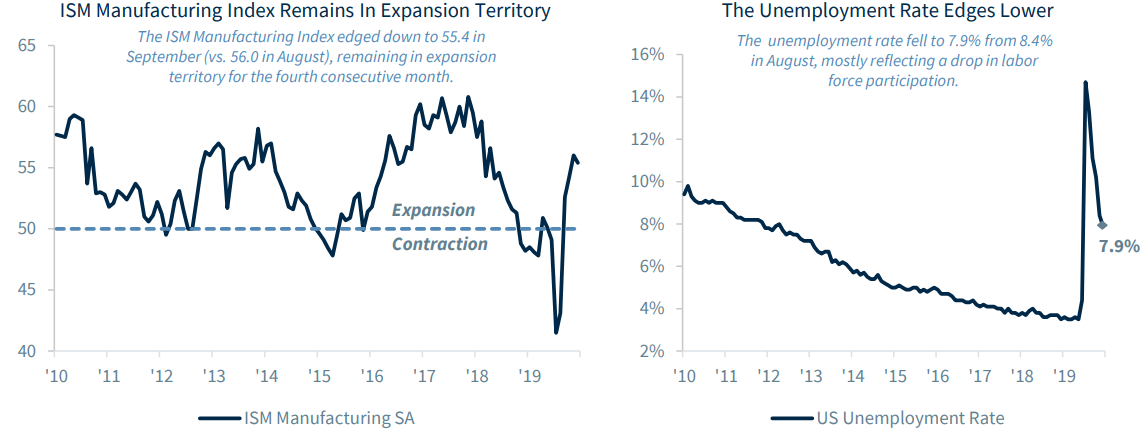

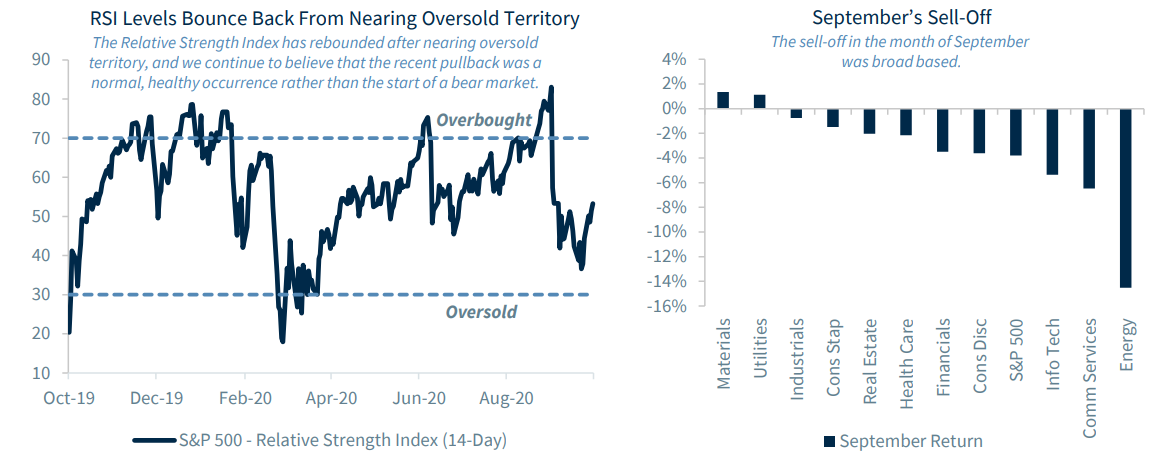

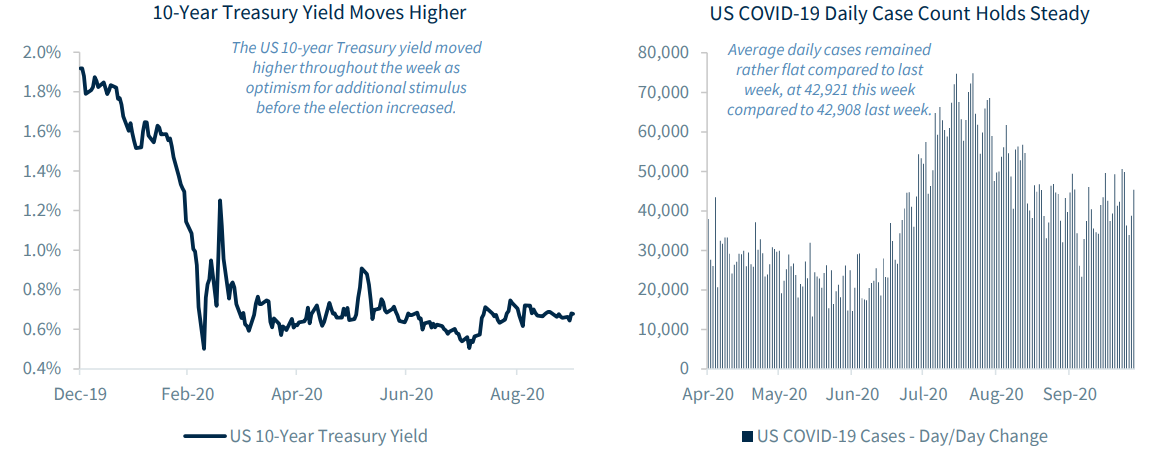

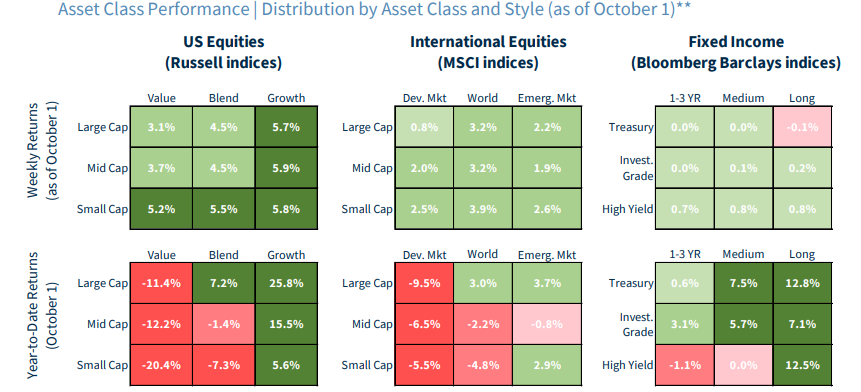

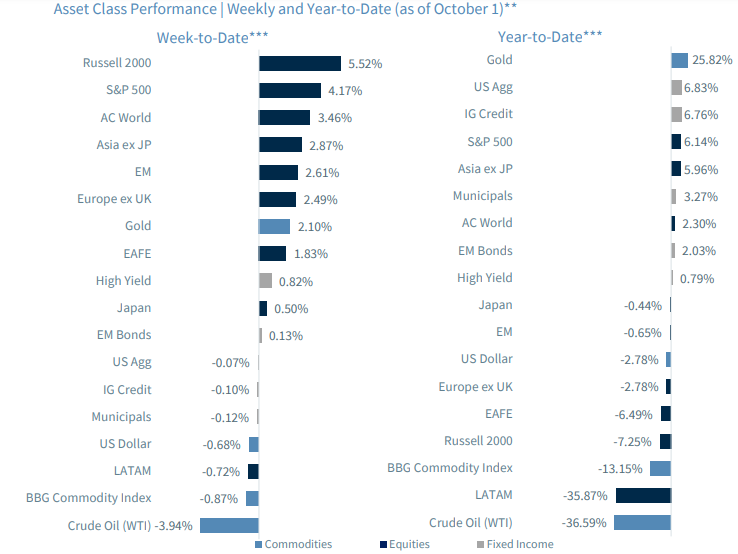

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [27]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)